# 1. Mount Drive & Setup Path

In [1]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = "/content/drive/My Drive/Colab Notebooks/SistemTemuKembaliInformasi/Minggu10/"

Mounted at /content/drive


# 2. Load Library

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Load Dataset

In [3]:
df = pd.read_csv(BASE_PATH + "tmdb_5000_movies.csv.gz", compression="gzip")

df = df[['title', 'tagline', 'overview', 'popularity']]
df['tagline'] = df['tagline'].fillna('')
df['overview'] = df['overview'].fillna('')

df['description'] = df['tagline'] + ' ' + df['overview']
df.head()

,title,tagline,overview,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",43.926995,"Lost in our world, found in another. John Cart..."


# 4. Text Preprocessing

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

df['clean_text'] = df['description'].apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,title,tagline,overview,popularity,description,clean_text
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora. In the 22nd centur...,enter world pandora nd century paraplegic mari...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins....",end world adventure begins captain barbossa lo...
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,107.376788,A Plan No One Escapes A cryptic message from B...,plan one escapes cryptic message bonds past se...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,112.312950,The Legend Ends Following the death of Distric...,legend ends following death district attorney ...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",43.926995,"Lost in our world, found in another. John Cart...",lost world found another john carter warweary ...


# 5. Feature Extraction (TF-IDF / CountVectorizer)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    ngram_range=(1,2),
    min_df=10,
    max_df=0.8
)

X = vectorizer.fit_transform(df['clean_text'])
X.shape

(4803, 3013)

# 6. K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

NUM_CLUSTERS = 6

kmeans = KMeans(
    n_clusters=NUM_CLUSTERS,
    random_state=42,
    n_init=10
)

df['cluster'] = kmeans.fit_predict(X)
df['cluster'].value_counts()

,count
cluster,
0,3013
5,656
2,471
1,404
3,240
4,19


# 7. Analisis Hasil Cluster

In [9]:
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(NUM_CLUSTERS):
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]
    print(f"Cluster {i+1}")
    print("Top Keywords:", top_terms)
    print("-"*60)

Cluster 1
Top Keywords: ['life', 'world', 'young', 'family', 'man', 'must', 'new', 'two', 'find', 'get']
------------------------------------------------------------
Cluster 2
Top Keywords: ['story', 'true', 'true story', 'life', 'world', 'based', 'man', 'young', 'tells', 'one']
------------------------------------------------------------
Cluster 3
Top Keywords: ['love', 'life', 'man', 'two', 'find', 'one', 'story', 'young', 'woman', 'world']
------------------------------------------------------------
Cluster 4
Top Keywords: ['new', 'york', 'new york', 'city', 'york city', 'one', 'life', 'world', 'young', 'two']
------------------------------------------------------------
Cluster 5
Top Keywords: ['ever', 'home', 'upon', 'escape', 'british', 'friends', 'native', 'must', 'living', 'city']
------------------------------------------------------------
Cluster 6
Top Keywords: ['one', 'two', 'life', 'man', 'get', 'young', 'world', 'find', 'time', 'family']
-----------------------------------

# 8. Film Populer per Cluster

In [10]:
cluster_movies = (
    df[['title', 'cluster', 'popularity']]
    .sort_values(['cluster', 'popularity'], ascending=False)
    .groupby('cluster')
    .head(5)
)

cluster_movies

,title,cluster,popularity
82,Dawn of the Planet of the Apes,5,243.791743
9,Batman v Superman: Dawn of Justice,5,155.790452
262,The Lord of the Rings: The Fellowship of the Ring,5,138.049577
55,Brave,5,125.114374
1008,Chappie,5,116.700319
1683,Pitch Perfect 2,4,71.496894
426,The Hunger Games,4,68.550698
137,Kung Fu Panda 2,4,51.247321
1108,Pinocchio,4,46.007991
1540,American Pie 2,4,36.432598


# 9. K-Means dengan Cosine Similarity

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(X)

kmeans_cosine = KMeans(
    n_clusters=NUM_CLUSTERS,
    random_state=42,
    n_init=10
)

df['cluster_cosine'] = kmeans_cosine.fit_predict(cosine_sim)
df['cluster_cosine'].value_counts()

,count
cluster_cosine,
2,2229
3,678
5,618
1,451
4,422
0,405


# 10. Hierarchical Clustering (Dendrogram)

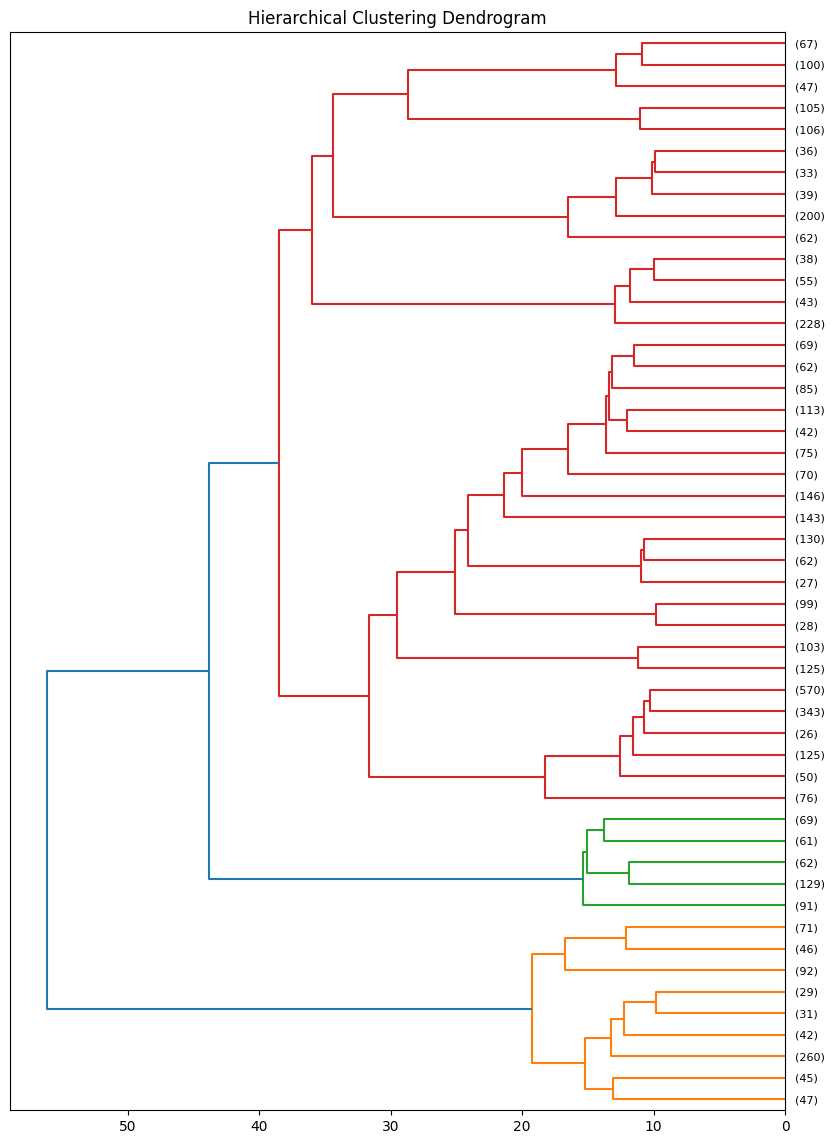

In [12]:
from scipy.cluster.hierarchy import ward, dendrogram

distance_matrix = 1 - cosine_similarity(X)
linkage_matrix = ward(distance_matrix)

plt.figure(figsize=(10, 14))
dendrogram(
    linkage_matrix,
    labels=df['title'].values,
    truncate_mode='lastp',
    p=50,
    orientation='left'
)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# 11. Kesimpulan

### Pada eksperimen ini, metode document clustering berhasil mengelompokkan film berdasarkan kemiripan konten deskripsinya tanpa menggunakan label (unsupervised learning). Hasil clustering menunjukkan bahwa film dalam satu cluster memiliki kata kunci dan tema yang relatif serupa, meskipun batas antar cluster tidak selalu tegas. Hal ini disebabkan oleh keterbatasan representasi fitur berbasis n-gram serta kompleksitas makna teks deskripsi film.